The 365 Learning Data Challenge
The task is to analyze data on student engagement, gather insights, and identify key opportunities for improvement.
the project is completed by building a machine learning model

Project Description

365 Data Science is an online learning platform specializing in data science courses. Students learn by watching video content, then evaluate their knowledge by taking quizzes, practice exams, course exams, and career track exams. The exams can be attempted more than once.

As a data scientist at 365, your task is to analyze an extract of a database on student engagement and identify key areas of improvement. The period under analysis is January 1, 2022 – October 20, 2022.

Keeping in mind the metrics that 365’s CEO might find useful, build a single-page dashboard or machine learning model and discuss your findings.

Ressources
A collection of 11 .csv files and 11 tables(for the SQL version) are provided.
The files:
365_course_info.csv
365_course_rating.csv
365_exam_info.csv
365_quiz_info.csv
365_student_engagement.csv
365_student_exams.csv
365_student_hub_questions.csv
365_student_info.csv
365_student_learning.csv
365_student_purchases.csv
365_student_quizzes.csv

The Task:
The task is to develop a machine learning model to predict whether a Free Plan user would convert to a paid subscriber or not.

relevant metrics, a confusion matrix etc are used for model evaluation.

In [1]:
# Importing relevant Libraries
import pandas as pd
import numpy as np
import sqlalchemy as sql
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from statistics import mean

In [2]:
#Importing the files for analysis

course_info = pd.read_csv('365_database/365_course_info.csv')

course_ratings = pd.read_csv('365_database/365_course_ratings.csv')

exam_info = pd.read_csv('365_database/365_exam_info.csv')

quiz_info = pd.read_csv('365_database/365_quiz_info.csv')

student_engagement = pd.read_csv('365_database/365_student_engagement.csv')

student_exams = pd.read_csv('365_database/365_student_exams.csv')

student_hub_questions = pd.read_csv('365_database/365_student_hub_questions.csv')

student_info = pd.read_csv('365_database/365_student_info.csv')

student_learning = pd.read_csv('365_database/365_student_learning.csv')

student_purchases = pd.read_csv('365_database/365_student_purchases.csv')

student_quizzes = pd.read_csv('365_database/365_student_quizzes.csv')


From further analysis which is not shown in this notebook the following files were chosen to create a dataframe which will be merged and further used for data preperation
1. student_info: This is the most important file and has student information present in it which will help link/merge other files for creating a new datafram
2. student_engagement: from the data exploration and the summary table given by 365 learning , it only makes sense to consider how student involvement through quizzes, exams and lessons can tell if they will purchase a subscription or not.
3. student_learning: Stores information about the courses a student has watched, how much of each course they have watched, and the date watched. 

# 1. Data Exploration

In [3]:
student_info

,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01
3,258801,IN,2022-01-01
4,258802,US,2022-01-01
...,...,...,...
35225,295511,CM,2022-10-20
35226,295512,CA,2022-10-20
35227,295513,SA,2022-10-20
35228,295514,NL,2022-10-20


In [4]:
student_engagement

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
0,1,274999,1,1,1,2022-05-27
1,3,274501,0,0,1,2022-05-27
2,4,272842,1,1,1,2022-05-27
3,8,275173,0,0,1,2022-05-27
4,11,274876,0,1,0,2022-05-27
...,...,...,...,...,...,...
65366,2649439,295185,0,0,1,2022-10-20
65367,2649446,282935,0,1,1,2022-10-20
65368,2649658,292048,0,0,1,2022-10-20
65369,2649818,295443,0,0,1,2022-10-20


In [5]:
student_learning

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07
...,...,...,...,...
64530,295509,23,0.8,2022-10-20
64531,295510,53,0.1,2022-10-20
64532,295511,7,7.8,2022-10-20
64533,295512,7,10.4,2022-10-20


In [6]:
student_info.nunique()

student_id         35230
student_country      180
date_registered      293
dtype: int64

There are a total of 35230 students registered between the time period of January 1, 2022 – October 20, 2022.

In [7]:
student_learning.nunique()

student_id         18167
course_id             50
minutes_watched     2215
date_watched         293
dtype: int64

In [8]:
student_purchases.nunique()

purchase_id       3041
student_id        2135
purchase_type        3
date_purchased     293
dtype: int64

In [9]:
student_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   purchase_id     3041 non-null   int64 
 1   student_id      3041 non-null   int64 
 2   purchase_type   3041 non-null   object
 3   date_purchased  3041 non-null   object
dtypes: int64(2), object(2)
memory usage: 95.2+ KB


In [10]:
#converting date object to date datatype
student_info['date_registered']=pd.to_datetime(student_info['date_registered'])

student_purchases['date_purchased']=pd.to_datetime(student_purchases['date_purchased'])

student_learning['date_watched']=pd.to_datetime(student_learning['date_watched'])

## 1.1 Exploring the student_purchases to understand paid students

Understanding the each purchase_type of the paid students as the aim of this project is to predict which free students will make a purchase. Thus, understanding what made a paid student make a purchase

In [11]:
df_purchased = pd.merge(student_info, student_purchases, how='inner',on = 'student_id')
df_purchased

,student_id,student_country,date_registered,purchase_id,purchase_type,date_purchased
0,258800,CA,2022-01-01,15781,Annual,2022-01-01
1,258803,US,2022-01-01,15786,Annual,2022-01-01
2,258818,IN,2022-01-01,15845,Annual,2022-01-03
3,258822,IN,2022-01-01,15941,Monthly,2022-01-09
4,258832,IN,2022-01-01,17437,Monthly,2022-03-05
...,...,...,...,...,...,...
3036,295256,CA,2022-10-19,23106,Monthly,2022-10-19
3037,295273,TR,2022-10-19,23111,Monthly,2022-10-19
3038,295355,US,2022-10-19,23126,Annual,2022-10-19
3039,295497,NL,2022-10-20,23152,Monthly,2022-10-20


In [12]:
df_purchased.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041 entries, 0 to 3040
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_id       3041 non-null   int64         
 1   student_country  3040 non-null   object        
 2   date_registered  3041 non-null   datetime64[ns]
 3   purchase_id      3041 non-null   int64         
 4   purchase_type    3041 non-null   object        
 5   date_purchased   3041 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 166.3+ KB


In [13]:
df_purchased.nunique()

student_id         2135
student_country     117
date_registered     292
purchase_id        3041
purchase_type         3
date_purchased      293
dtype: int64

In [14]:
df_purchased.purchase_type.value_counts()


Annual       1547
Monthly      1444
Quarterly      50
Name: purchase_type, dtype: int64

Here we explore the different purchase types students purchase

In [15]:
(df_purchased.groupby('purchase_type').nunique())

,student_id,student_country,date_registered,purchase_id,date_purchased
purchase_type,,,,,
Annual,1544,101,288,1547,277
Monthly,611,88,249,1444,284
Quarterly,38,17,34,50,45


In [16]:
#Understanding Annual, monthly and quarterly data

In [17]:
annual=df_purchased[df_purchased['purchase_type']=='Annual']

In [18]:
annual

,student_id,student_country,date_registered,purchase_id,purchase_type,date_purchased
0,258800,CA,2022-01-01,15781,Annual,2022-01-01
1,258803,US,2022-01-01,15786,Annual,2022-01-01
2,258818,IN,2022-01-01,15845,Annual,2022-01-03
5,258862,NL,2022-01-01,15808,Annual,2022-01-01
6,258865,CA,2022-01-01,15809,Annual,2022-01-01
...,...,...,...,...,...,...
3032,294979,GB,2022-10-16,23065,Annual,2022-10-16
3034,295106,US,2022-10-17,23107,Annual,2022-10-19
3035,295214,GB,2022-10-18,23103,Annual,2022-10-18
3038,295355,US,2022-10-19,23126,Annual,2022-10-19


In [19]:
annual.student_id.value_counts()

271197    2
264131    2
280121    2
268287    1
260813    1
         ..
263535    1
261490    1
279923    1
265588    1
271951    1
Name: student_id, Length: 1544, dtype: int64

In [20]:
annual[annual['student_id']==271197]

,student_id,student_country,date_registered,purchase_id,purchase_type,date_purchased
1500,271197,ES,2022-04-18,18838,Annual,2022-04-25
1501,271197,ES,2022-04-18,22659,Annual,2022-09-29


In [21]:
annual[annual['student_id']==264131]

,student_id,student_country,date_registered,purchase_id,purchase_type,date_purchased
695,264131,SA,2022-02-18,17226,Annual,2022-02-24
696,264131,SA,2022-02-18,18183,Annual,2022-03-31


In [22]:
annual[annual['student_id']==280121]

,student_id,student_country,date_registered,purchase_id,purchase_type,date_purchased
2225,280121,CA,2022-07-02,20588,Annual,2022-07-05
2226,280121,CA,2022-07-02,20907,Annual,2022-07-18


([<matplotlib.patches.Wedge at 0x1a5827e4fa0>,
 [Text(-1.0999795071101666, 0.006714457362684692, ''),
  Text(1.0999795073827456, -0.006714412707942268, '')])

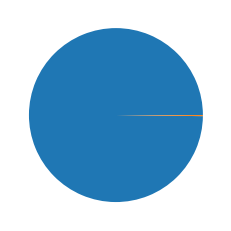

In [23]:
plt.pie((annual.student_id.value_counts()).value_counts())

In [24]:
monthly=df_purchased[df_purchased['purchase_type']=='Monthly']

In [25]:
monthly

,student_id,student_country,date_registered,purchase_id,purchase_type,date_purchased
3,258822,IN,2022-01-01,15941,Monthly,2022-01-09
4,258832,IN,2022-01-01,17437,Monthly,2022-03-05
9,258908,US,2022-01-01,15813,Monthly,2022-01-01
13,258930,SA,2022-01-02,17124,Monthly,2022-02-19
16,258956,IN,2022-01-02,18158,Monthly,2022-03-31
...,...,...,...,...,...,...
3030,294936,IN,2022-10-16,23080,Monthly,2022-10-17
3033,295088,NL,2022-10-17,23096,Monthly,2022-10-18
3036,295256,CA,2022-10-19,23106,Monthly,2022-10-19
3037,295273,TR,2022-10-19,23111,Monthly,2022-10-19


In [26]:
monthly.student_id.value_counts()

259965    10
259702    10
260465    10
263483     9
261491     9
          ..
283730     1
265302     1
291949     1
275567     1
293497     1
Name: student_id, Length: 611, dtype: int64

In [27]:
(monthly.student_id.value_counts()).value_counts()

1     289
2     138
3      61
4      41
5      33
7      18
8      14
6       9
9       5
10      3
Name: student_id, dtype: int64

In [28]:
monthly.groupby('student_id').nunique()

,student_country,date_registered,purchase_id,purchase_type,date_purchased
student_id,,,,,
258822,1,1,1,1,1
258832,1,1,1,1,1
258908,1,1,1,1,1
258930,1,1,1,1,1
258956,1,1,4,1,4
...,...,...,...,...,...
294936,1,1,1,1,1
295088,1,1,1,1,1
295256,1,1,1,1,1


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


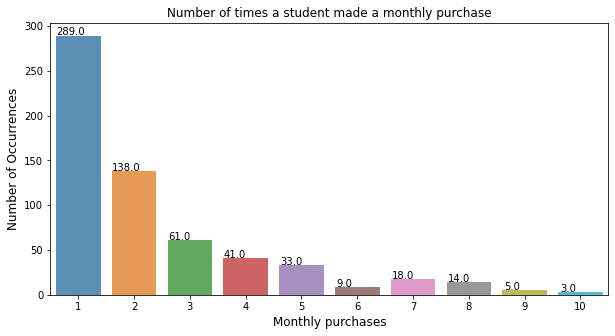

In [29]:
# Plotting a bar graph of the Number of times a student made a monthly purchase
# in the column 'student_id'

monthly_count  = (monthly.student_id.value_counts()).value_counts()

plt.figure(figsize=(10,5))
ax=sns.barplot(monthly_count.index, monthly_count.values, alpha=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Number of times a student made a monthly purchase')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Monthly purchases', fontsize=12)
plt.show()

In [30]:
quarterly=df_purchased[df_purchased['purchase_type']=='Quarterly']

In [31]:
quarterly.head()

,student_id,student_country,date_registered,purchase_id,purchase_type,date_purchased
37,259171,US,2022-01-04,16459,Quarterly,2022-01-25
157,260164,JM,2022-01-12,16023,Quarterly,2022-01-12
158,260164,JM,2022-01-12,18449,Quarterly,2022-04-12
160,260173,US,2022-01-12,16027,Quarterly,2022-01-13
161,260173,US,2022-01-12,18481,Quarterly,2022-04-13


In [32]:
quarterly.student_id.value_counts()

260173    4
261608    3
279738    2
270240    2
261564    2
262714    2
260164    2
280461    2
264295    2
272596    1
280346    1
264856    1
284241    1
263888    1
272977    1
271837    1
282507    1
282442    1
291401    1
280814    1
293251    1
261979    1
268863    1
291626    1
262270    1
259171    1
269796    1
278890    1
292048    1
291400    1
262221    1
281074    1
262643    1
285344    1
274166    1
272696    1
262973    1
283745    1
Name: student_id, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


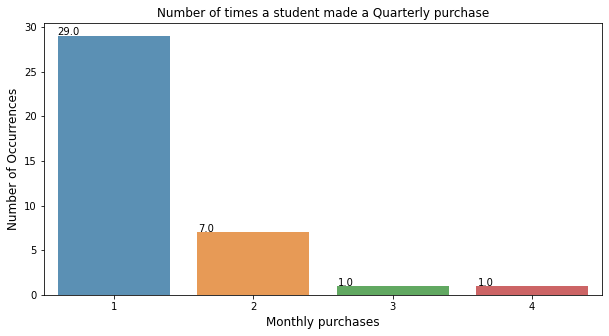

In [33]:
quaterly_count  = (quarterly.student_id.value_counts()).value_counts()

plt.figure(figsize=(10,5))
ax=sns.barplot(quaterly_count.index, quaterly_count.values, alpha=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Number of times a student made a Quarterly purchase')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Monthly purchases', fontsize=12)
plt.show()

# 2. Data Preprocessing

## 2.1. Creating a dataframe for machine learning

Joining both student_info and student_purchases through outer join

In [34]:
df = pd.merge(student_info, student_purchases, how='outer',on = 'student_id')
df

,student_id,student_country,date_registered,purchase_id,purchase_type,date_purchased
0,258798,IN,2022-01-01,NaN,NaN,NaT
1,258799,CO,2022-01-01,NaN,NaN,NaT
2,258800,CA,2022-01-01,15781.0,Annual,2022-01-01
3,258801,IN,2022-01-01,NaN,NaN,NaT
4,258802,US,2022-01-01,NaN,NaN,NaT
...,...,...,...,...,...,...
36131,295511,CM,2022-10-20,NaN,NaN,NaT
36132,295512,CA,2022-10-20,NaN,NaN,NaT
36133,295513,SA,2022-10-20,NaN,NaN,NaT
36134,295514,NL,2022-10-20,NaN,NaN,NaT


In [35]:
#finding any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36136 entries, 0 to 36135
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_id       36136 non-null  int64         
 1   student_country  36123 non-null  object        
 2   date_registered  36136 non-null  datetime64[ns]
 3   purchase_id      3041 non-null   float64       
 4   purchase_type    3041 non-null   object        
 5   date_purchased   3041 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 1.9+ MB


In [36]:
#Identifying unique values in each row
df.nunique()

student_id         35230
student_country      180
date_registered      293
purchase_id         3041
purchase_type          3
date_purchased       293
dtype: int64

In [37]:
#Creating targets based on the purchase_type

df['purchased']=""
for i in range(0,len(df)):
    if df['purchase_type'][i] in ('Annual','Monthly','Quarterly'):
        df['purchased'][i]='1'#yes purchase
    else:
        df['purchased'][i]='0'#not purchase
        

<ipython-input-37-972d2e1c05d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purchased'][i]='0'#not purchase
<ipython-input-37-972d2e1c05d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purchased'][i]='1'#yes purchase


In [38]:
df

,student_id,student_country,date_registered,purchase_id,purchase_type,date_purchased,purchased
0,258798,IN,2022-01-01,NaN,NaN,NaT,0
1,258799,CO,2022-01-01,NaN,NaN,NaT,0
2,258800,CA,2022-01-01,15781.0,Annual,2022-01-01,1
3,258801,IN,2022-01-01,NaN,NaN,NaT,0
4,258802,US,2022-01-01,NaN,NaN,NaT,0
...,...,...,...,...,...,...,...
36131,295511,CM,2022-10-20,NaN,NaN,NaT,0
36132,295512,CA,2022-10-20,NaN,NaN,NaT,0
36133,295513,SA,2022-10-20,NaN,NaN,NaT,0
36134,295514,NL,2022-10-20,NaN,NaN,NaT,0


In [39]:
#Identifying the number of paid and free students
df.purchased.value_counts()

0    33095
1     3041
Name: purchased, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36136 entries, 0 to 36135
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_id       36136 non-null  int64         
 1   student_country  36123 non-null  object        
 2   date_registered  36136 non-null  datetime64[ns]
 3   purchase_id      3041 non-null   float64       
 4   purchase_type    3041 non-null   object        
 5   date_purchased   3041 non-null   datetime64[ns]
 6   purchased        36136 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 3.5+ MB


imputing values in areas where data is missing

In [41]:
#We are going to drop purchase_id as its invalid in the process.
df=df.drop(['purchase_id'],axis=1)

In [42]:
#Replacing the string value to its unique integer number(encoding)
df=df.replace({np.nan:0,'Annual':1,'Monthly':2,'Quarterly':3})

From seeing the data we know that most of the data to impute are to replaced with zero .

We are not deleting date_purchased and instead replacing it in zero as it will help in selecting/filtering the paid students data further.

We are also going to replace null purchase_type with zero as those who did not purchase anything are shown as 0 in the purchase_type

In [43]:
#Replacing all the null values to 0
df=df.replace({np.nan:0})
df

,student_id,student_country,date_registered,purchase_type,date_purchased,purchased
0,258798,IN,2022-01-01,0,0,0
1,258799,CO,2022-01-01,0,0,0
2,258800,CA,2022-01-01,1,2022-01-01 00:00:00,1
3,258801,IN,2022-01-01,0,0,0
4,258802,US,2022-01-01,0,0,0
...,...,...,...,...,...,...
36131,295511,CM,2022-10-20,0,0,0
36132,295512,CA,2022-10-20,0,0,0
36133,295513,SA,2022-10-20,0,0,0
36134,295514,NL,2022-10-20,0,0,0


## 2.2. grouping student_engagement data

1. Here we are going to merge purchased/paid and free_student and student_learning separately where we are going to select the minutes watched by each students before making the purchase 
2. We then concat the purchased and free students filtered and grouped data into one as students_learning_grouped which will then be merged with df

grouping student_id to have the total number of minutes watched by a student

In [44]:
purchased_learning=pd.merge(df[df['purchased']=='1'], student_learning,how='inner',on = 'student_id')
purchased_learning

,student_id,student_country,date_registered,purchase_type,date_purchased,purchased,course_id,minutes_watched,date_watched
0,258800,CA,2022-01-01,1,2022-01-01 00:00:00,1,2,12.9,2022-04-01
1,258800,CA,2022-01-01,1,2022-01-01 00:00:00,1,7,46.8,2022-01-03
2,258800,CA,2022-01-01,1,2022-01-01 00:00:00,1,7,4.3,2022-01-04
3,258800,CA,2022-01-01,1,2022-01-01 00:00:00,1,7,31.7,2022-01-07
4,258800,CA,2022-01-01,1,2022-01-01 00:00:00,1,7,61.6,2022-01-05
...,...,...,...,...,...,...,...,...,...
60424,295214,GB,2022-10-18,1,2022-10-18 00:00:00,1,23,2.0,2022-10-18
60425,295256,CA,2022-10-19,2,2022-10-19 00:00:00,1,7,152.8,2022-10-19
60426,295256,CA,2022-10-19,2,2022-10-19 00:00:00,1,21,162.0,2022-10-20
60427,295355,US,2022-10-19,1,2022-10-19 00:00:00,1,14,1.3,2022-10-19


In [45]:
#selecting the minutes each student watched before making the purchase

In [46]:
purchased_learning=purchased_learning.loc[(purchased_learning['date_watched']<purchased_learning['date_purchased'])]

In [47]:
purchased_learning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16781 entries, 139 to 60422
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_id       16781 non-null  int64         
 1   student_country  16781 non-null  object        
 2   date_registered  16781 non-null  datetime64[ns]
 3   purchase_type    16781 non-null  int64         
 4   date_purchased   16781 non-null  object        
 5   purchased        16781 non-null  object        
 6   course_id        16781 non-null  int64         
 7   minutes_watched  16781 non-null  float64       
 8   date_watched     16781 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 1.3+ MB


In [48]:
#grouping the based on student_id to find the sum of minutes_watched among paid students
students_learning_grouped_purchased=(purchased_learning.groupby('student_id').sum()).reset_index()
students_learning_grouped_purchased

,student_id,purchase_type,course_id,minutes_watched
0,258822,2,7,0.1
1,258832,12,162,71.2
2,258913,4,58,358.9
3,258922,2,14,25.8
4,258930,10,91,142.6
...,...,...,...,...
970,294907,2,7,59.2
971,294936,2,20,16.5
972,294949,1,20,13.2
973,295088,2,7,48.1


In [49]:
free_learning=pd.merge(df[df['purchased']=='0'], student_learning,how='inner',on = 'student_id')
free_learning

,student_id,student_country,date_registered,purchase_type,date_purchased,purchased,course_id,minutes_watched,date_watched
0,258798,IN,2022-01-01,0,0,0,23,0.3,2022-01-01
1,258804,BD,2022-01-01,0,0,0,14,14.2,2022-01-01
2,258807,US,2022-01-01,0,0,0,7,1.8,2022-01-01
3,258809,ID,2022-01-01,0,0,0,14,4.1,2022-01-01
4,258809,ID,2022-01-01,0,0,0,14,9.2,2022-01-02
...,...,...,...,...,...,...,...,...,...
27199,295509,EG,2022-10-20,0,0,0,23,0.8,2022-10-20
27200,295510,IN,2022-10-20,0,0,0,53,0.1,2022-10-20
27201,295511,CM,2022-10-20,0,0,0,7,7.8,2022-10-20
27202,295512,CA,2022-10-20,0,0,0,7,10.4,2022-10-20


In [50]:
students_learning_grouped_free=(free_learning.groupby('student_id').sum()).reset_index()
students_learning_grouped_free

,student_id,purchase_type,course_id,minutes_watched
0,258798,0,23,0.3
1,258804,0,14,14.2
2,258807,0,7,1.8
3,258809,0,42,53.3
4,258810,0,14,3.2
...,...,...,...,...
16135,295509,0,23,0.8
16136,295510,0,53,0.1
16137,295511,0,7,7.8
16138,295512,0,7,10.4


In [51]:
#merging the paid and free students learning grouped
students_learning_grouped=pd.concat([students_learning_grouped_purchased,students_learning_grouped_free])
students_learning_grouped=students_learning_grouped.sample(frac=1).reset_index(drop=True)
students_learning_grouped=students_learning_grouped.drop(['purchase_type'],axis=1)
students_learning_grouped

,student_id,course_id,minutes_watched
0,271715,27,0.6
1,285003,65,33.9
2,288334,37,1.4
3,267421,15,18.9
4,263698,91,19.3
...,...,...,...
17110,293583,17,209.4
17111,294898,7,0.6
17112,258840,14,42.1
17113,281742,14,42.7


## 2.3. Understanding and filtering student_enagement of paid and free students 

In this section the following are done:
1. In this section we merge the grouped student learning data with the student_engagment data 
2. We then divide the merged student engagement data into purchased and not_purchased students data and explore the trends 
3. We also divide the data into student_engagement before making the purchase and after making the purchase
4. The before making the purchase student data is selected and merged with randomly chosen free or not_purchased students leading us to our final dataset for training

In [52]:
#merging student_info, student_purchases and student_engagement data with students_learning grouped data
df2=pd.merge(df, students_learning_grouped,how='inner',on = 'student_id')

In [53]:
df2=pd.merge(df2, student_engagement,how='inner',on = 'student_id')

In [54]:
df2=df2.reset_index(drop=True)

In [55]:
df2

,student_id,student_country,date_registered,purchase_type,date_purchased,purchased,course_id,minutes_watched,engagement_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
0,258798,IN,2022-01-01,0,0,0,23,0.3,378673,0,0,1,2022-01-01
1,258804,BD,2022-01-01,0,0,0,14,14.2,110921,1,0,1,2022-01-01
2,258807,US,2022-01-01,0,0,0,7,1.8,378694,0,0,1,2022-01-01
3,258809,ID,2022-01-01,0,0,0,42,53.3,110922,1,0,1,2022-01-02
4,258809,ID,2022-01-01,0,0,0,42,53.3,110923,1,0,1,2022-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71886,295509,EG,2022-10-20,0,0,0,23,0.8,2648750,0,0,1,2022-10-20
71887,295510,IN,2022-10-20,0,0,0,53,0.1,2648820,0,0,1,2022-10-20
71888,295511,CM,2022-10-20,0,0,0,7,7.8,2648943,1,0,1,2022-10-20
71889,295512,CA,2022-10-20,0,0,0,7,10.4,2649150,1,0,1,2022-10-20


Trying to find the patterns between paid students before making and purchases

In [56]:
#trends of paid students before and after making the subscription the minutes watched are taken after 

purchased=df2[df2['purchased']=='1']
not_purchased=df2[df2['purchased']=='0']

In [57]:
purchased

,student_id,student_country,date_registered,purchase_type,date_purchased,purchased,course_id,minutes_watched,engagement_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
19,258822,IN,2022-01-01,2,2022-01-09 00:00:00,1,7,0.1,110952,1,1,1,2022-01-09
20,258822,IN,2022-01-01,2,2022-01-09 00:00:00,1,7,0.1,110953,1,1,1,2022-01-10
21,258822,IN,2022-01-01,2,2022-01-09 00:00:00,1,7,0.1,110954,1,0,1,2022-01-13
22,258822,IN,2022-01-01,2,2022-01-09 00:00:00,1,7,0.1,110955,1,0,1,2022-01-14
23,258822,IN,2022-01-01,2,2022-01-09 00:00:00,1,7,0.1,110956,1,0,1,2022-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71604,295088,NL,2022-10-17,2,2022-10-18 00:00:00,1,7,48.1,2591603,1,1,1,2022-10-17
71605,295088,NL,2022-10-17,2,2022-10-18 00:00:00,1,7,48.1,2601609,1,1,1,2022-10-18
71606,295088,NL,2022-10-17,2,2022-10-18 00:00:00,1,7,48.1,2619281,1,1,1,2022-10-19
71621,295106,US,2022-10-17,1,2022-10-19 00:00:00,1,7,186.3,2595932,1,1,1,2022-10-18


In [58]:
purchased.engagement_exams.value_counts()

0    31484
1    12944
Name: engagement_exams, dtype: int64

In [59]:
#understanding purchased students pattern before making the purchase

In [60]:

purchased.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44428 entries, 19 to 71622
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   student_id          44428 non-null  int64         
 1   student_country     44428 non-null  object        
 2   date_registered     44428 non-null  datetime64[ns]
 3   purchase_type       44428 non-null  int64         
 4   date_purchased      44428 non-null  object        
 5   purchased           44428 non-null  object        
 6   course_id           44428 non-null  int64         
 7   minutes_watched     44428 non-null  float64       
 8   engagement_id       44428 non-null  int64         
 9   engagement_quizzes  44428 non-null  int64         
 10  engagement_exams    44428 non-null  int64         
 11  engagement_lessons  44428 non-null  int64         
 12  date_engaged        44428 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(7), o

In [61]:
purchased['date_purchased']=pd.to_datetime(purchased['date_purchased'])
purchased['date_engaged']=pd.to_datetime(purchased['date_engaged'])

<ipython-input-61-da4747a5da15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchased['date_purchased']=pd.to_datetime(purchased['date_purchased'])
<ipython-input-61-da4747a5da15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchased['date_engaged']=pd.to_datetime(purchased['date_engaged'])


In [62]:
purchased['difference']=purchased.date_purchased-purchased.date_registered

<ipython-input-62-e6080ba630f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchased['difference']=purchased.date_purchased-purchased.date_registered


In [63]:
purchased

,student_id,student_country,date_registered,purchase_type,date_purchased,purchased,course_id,minutes_watched,engagement_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged,difference
19,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110952,1,1,1,2022-01-09,8 days
20,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110953,1,1,1,2022-01-10,8 days
21,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110954,1,0,1,2022-01-13,8 days
22,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110955,1,0,1,2022-01-14,8 days
23,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110956,1,0,1,2022-01-16,8 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71604,295088,NL,2022-10-17,2,2022-10-18,1,7,48.1,2591603,1,1,1,2022-10-17,1 days
71605,295088,NL,2022-10-17,2,2022-10-18,1,7,48.1,2601609,1,1,1,2022-10-18,1 days
71606,295088,NL,2022-10-17,2,2022-10-18,1,7,48.1,2619281,1,1,1,2022-10-19,1 days
71621,295106,US,2022-10-17,1,2022-10-19,1,7,186.3,2595932,1,1,1,2022-10-18,2 days


In [64]:
purchased.difference.value_counts()

1 days      4298
0 days      2393
2 days      2191
4 days      1407
31 days     1393
            ... 
146 days       6
148 days       6
210 days       6
98 days        5
138 days       4
Name: difference, Length: 194, dtype: int64

In [65]:
after_purchase=purchased[purchased['date_engaged']>=purchased['date_purchased']]
after_purchase

,student_id,student_country,date_registered,purchase_type,date_purchased,purchased,course_id,minutes_watched,engagement_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged,difference
19,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110952,1,1,1,2022-01-09,8 days
20,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110953,1,1,1,2022-01-10,8 days
21,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110954,1,0,1,2022-01-13,8 days
22,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110955,1,0,1,2022-01-14,8 days
23,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110956,1,0,1,2022-01-16,8 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71509,294949,US,2022-10-16,1,2022-10-17,1,20,13.2,2630597,1,1,1,2022-10-19,1 days
71510,294949,US,2022-10-16,1,2022-10-17,1,20,13.2,2642957,1,1,1,2022-10-20,1 days
71605,295088,NL,2022-10-17,2,2022-10-18,1,7,48.1,2601609,1,1,1,2022-10-18,1 days
71606,295088,NL,2022-10-17,2,2022-10-18,1,7,48.1,2619281,1,1,1,2022-10-19,1 days


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'after purchase Enagement_quizzes')

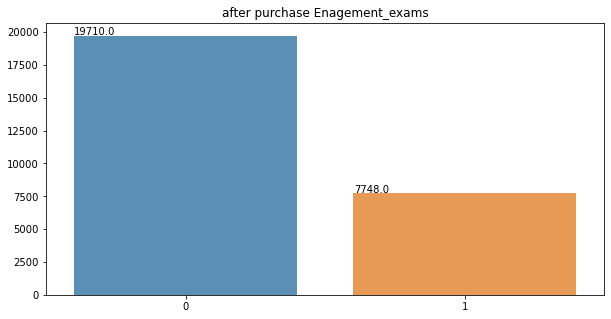

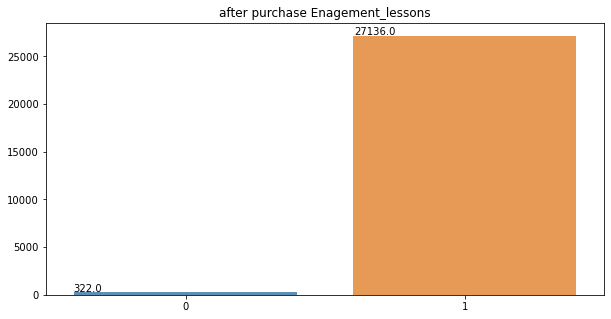

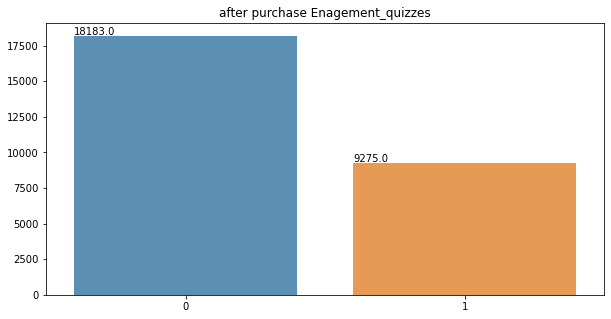

In [66]:
engagement_exams  = after_purchase.engagement_exams.value_counts()

plt.figure(figsize=(10,5))
ax=sns.barplot(engagement_exams.index, engagement_exams.values, alpha=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('after purchase Enagement_exams')


engagement_lessons = after_purchase.engagement_lessons.value_counts()

plt.figure(figsize=(10,5))
ax=sns.barplot(engagement_lessons.index, engagement_lessons.values, alpha=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('after purchase Enagement_lessons')

engagement_quizes = after_purchase.engagement_quizzes.value_counts()

plt.figure(figsize=(10,5))
ax=sns.barplot(engagement_quizes.index, engagement_quizes.values, alpha=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('after purchase Enagement_quizzes')

Selecting the trends of the students who have time difference of more than or equal to 5 days between the date registered and date_purchased. Number 5 was selected randomly

In [67]:
before_purchase=purchased[purchased['difference']>='2 days']

In [68]:
before_purchase

,student_id,student_country,date_registered,purchase_type,date_purchased,purchased,course_id,minutes_watched,engagement_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged,difference
19,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110952,1,1,1,2022-01-09,8 days
20,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110953,1,1,1,2022-01-10,8 days
21,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110954,1,0,1,2022-01-13,8 days
22,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110955,1,0,1,2022-01-14,8 days
23,258822,IN,2022-01-01,2,2022-01-09,1,7,0.1,110956,1,0,1,2022-01-16,8 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71371,294783,IN,2022-10-15,2,2022-10-18,1,28,71.4,2603500,1,1,1,2022-10-18,3 days
71372,294783,IN,2022-10-15,2,2022-10-18,1,28,71.4,2616020,1,0,1,2022-10-19,3 days
71373,294783,IN,2022-10-15,2,2022-10-18,1,28,71.4,2635030,1,0,1,2022-10-20,3 days
71621,295106,US,2022-10-17,1,2022-10-19,1,7,186.3,2595932,1,1,1,2022-10-18,2 days


In [69]:
before_purchase.difference.value_counts()

2 days      2191
4 days      1407
31 days     1393
7 days      1362
3 days      1267
            ... 
24 days        6
148 days       6
210 days       6
98 days        5
138 days       4
Name: difference, Length: 192, dtype: int64

In [70]:
before_purchased_date=before_purchase.loc[(before_purchase['date_registered']<before_purchase['date_purchased'])]


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Countries that has most paid students engaged')

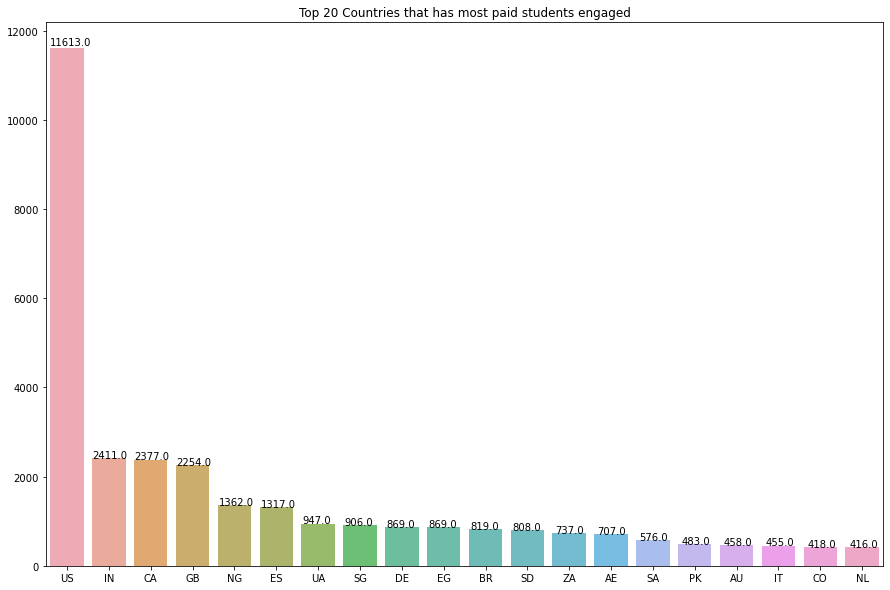

In [71]:
Country = (before_purchased_date.student_country.value_counts())

plt.figure(figsize=(15,10))
ax=sns.barplot(Country.index[:20], Country.values[:20], alpha=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Top 20 Countries that has most paid students engaged')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'before purchase Enagement_quizzes')

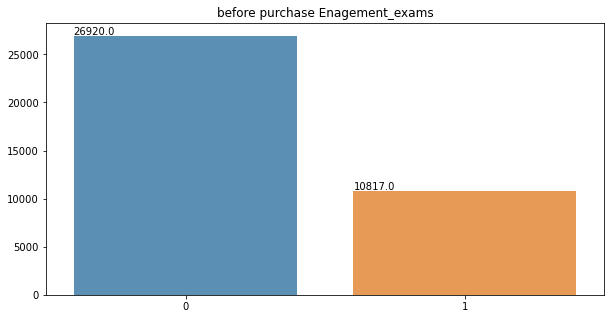

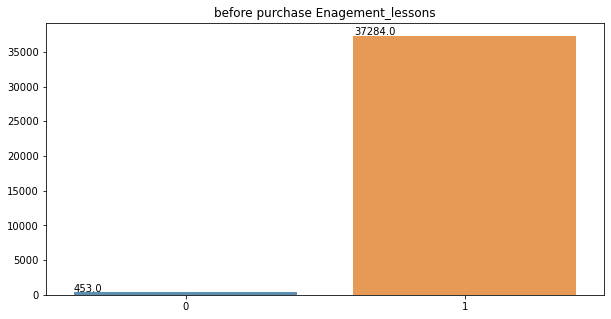

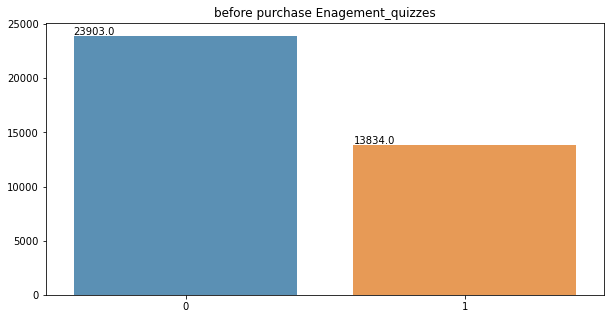

In [72]:
engagement_exams  = before_purchased_date.engagement_exams.value_counts()

plt.figure(figsize=(10,5))
ax=sns.barplot(engagement_exams.index, engagement_exams.values, alpha=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('before purchase Enagement_exams')


engagement_lessons = before_purchased_date.engagement_lessons.value_counts()

plt.figure(figsize=(10,5))
ax=sns.barplot(engagement_lessons.index, engagement_lessons.values, alpha=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('before purchase Enagement_lessons')

engagement_quizes = before_purchased_date.engagement_quizzes.value_counts()

plt.figure(figsize=(10,5))
ax=sns.barplot(engagement_quizes.index, engagement_quizes.values, alpha=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('before purchase Enagement_quizzes')

Student engagement before and after making the purchase

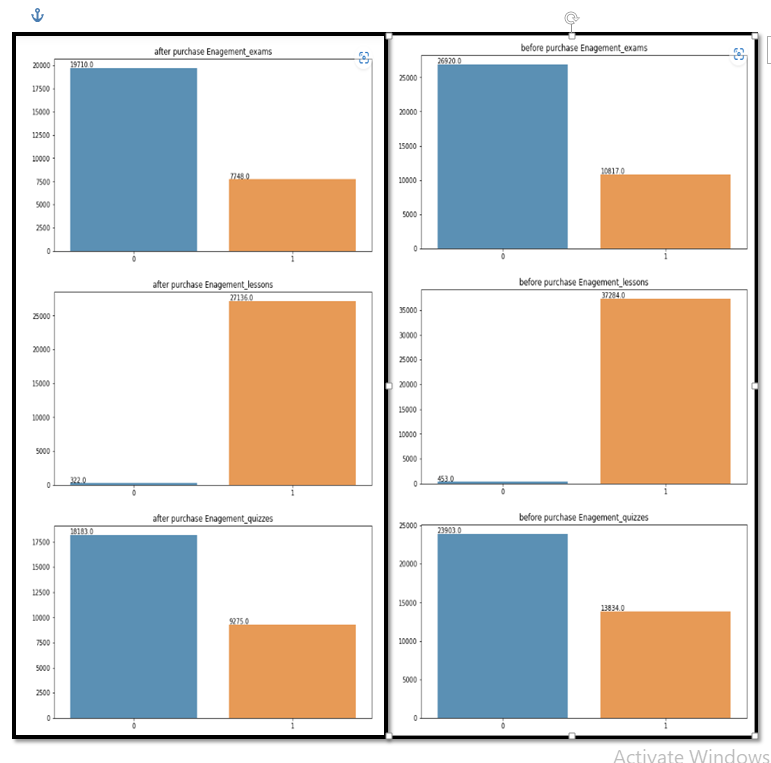

In [73]:
#selecting random number of data to see if the student engagement was more before purchase, could be because the stduents liked the content

In [74]:
not_purchased_random = not_purchased.sample(n=len(before_purchased_date),replace=True)
not_purchased_random

,student_id,student_country,date_registered,purchase_type,date_purchased,purchased,course_id,minutes_watched,engagement_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
49457,277776,AU,2022-06-14,0,0,0,35,27.6,645006,1,0,1,2022-06-15
18046,263805,EG,2022-02-15,0,0,0,28,0.4,384429,0,0,1,2022-02-15
68977,292186,BD,2022-09-27,0,0,0,28,0.1,2263591,0,0,1,2022-09-27
54786,280644,IT,2022-07-07,0,0,0,596,1163.8,1786166,0,0,1,2022-08-22
61248,284930,NG,2022-08-11,0,0,0,38,51.2,1430936,0,0,1,2022-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,260247,MY,2022-01-13,0,0,0,104,31.0,380253,0,0,1,2022-02-09
38998,272173,PK,2022-04-27,0,0,0,197,466.2,608357,0,0,1,2022-06-12
40310,272782,US,2022-05-04,0,0,0,14,24.3,119721,1,0,1,2022-05-04
40999,273013,LT,2022-05-06,0,0,0,46,0.4,390845,0,0,1,2022-05-06


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 20 Countries that has most free students engaged')

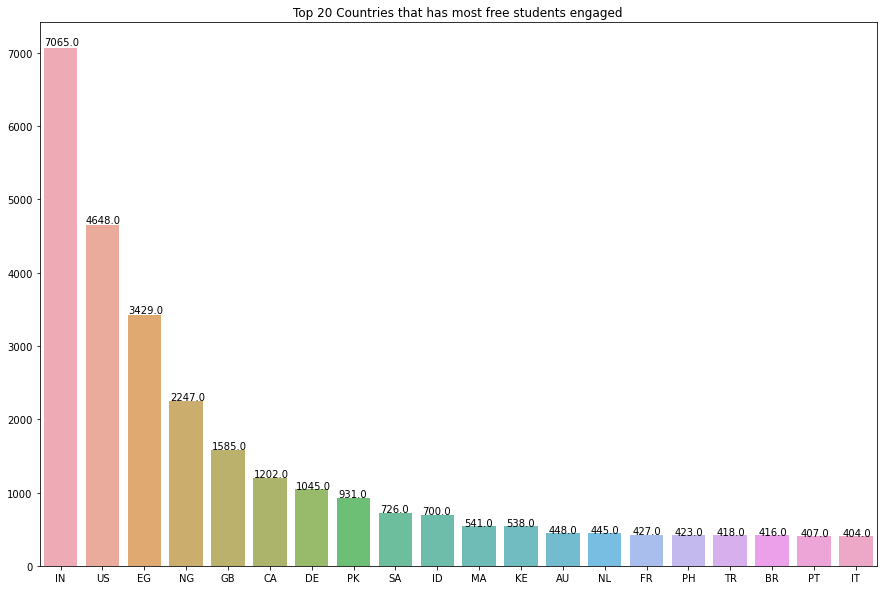

In [75]:
Country = (not_purchased_random.student_country.value_counts())

plt.figure(figsize=(15,10))
ax=sns.barplot(Country.index[:20], Country.values[:20], alpha=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Top 20 Countries that has most free students engaged')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'free students Enagement_quizzes')

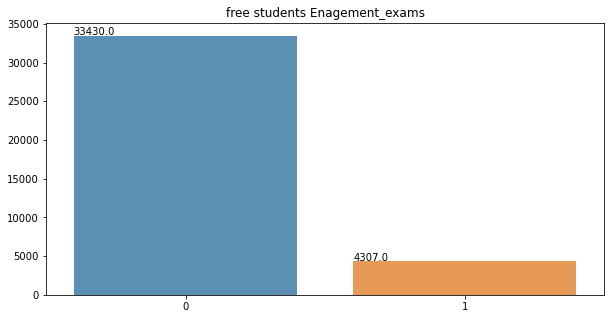

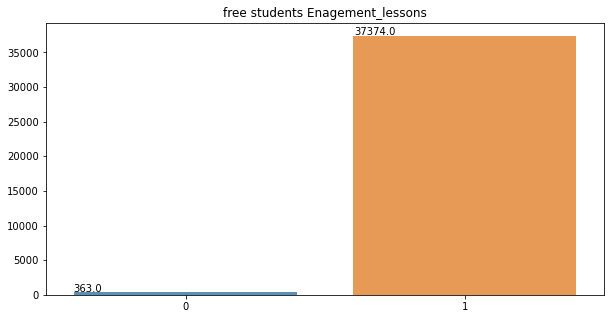

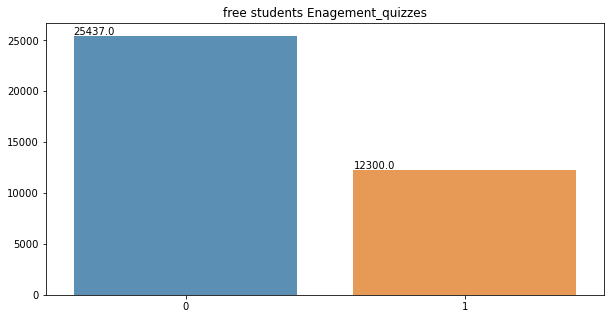

In [76]:
engagement_exams  = not_purchased_random.engagement_exams.value_counts()

plt.figure(figsize=(10,5))
ax=sns.barplot(engagement_exams.index, engagement_exams.values, alpha=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('free students Enagement_exams')


engagement_lessons = not_purchased_random.engagement_lessons.value_counts()

plt.figure(figsize=(10,5))
ax=sns.barplot(engagement_lessons.index, engagement_lessons.values, alpha=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('free students Enagement_lessons')

engagement_quizes = not_purchased_random.engagement_quizzes.value_counts()

plt.figure(figsize=(10,5))
ax=sns.barplot(engagement_quizes.index, engagement_quizes.values, alpha=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('free students Enagement_quizzes')

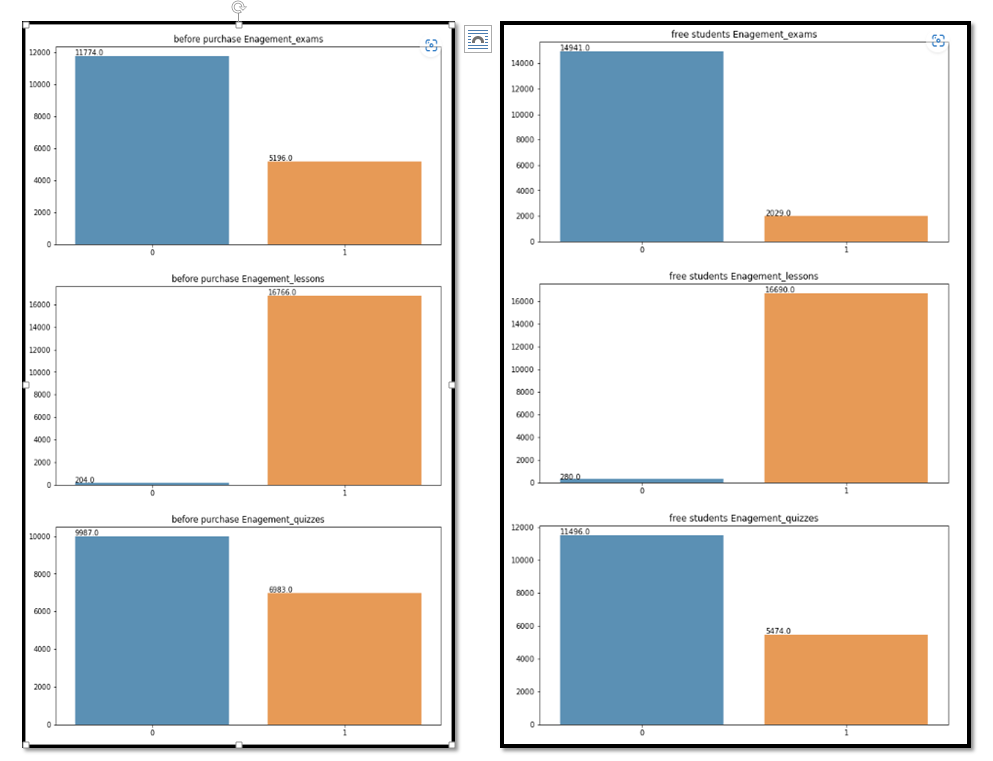

In [77]:
#the graph is similar of the free students after shuffling or selecting random data in general

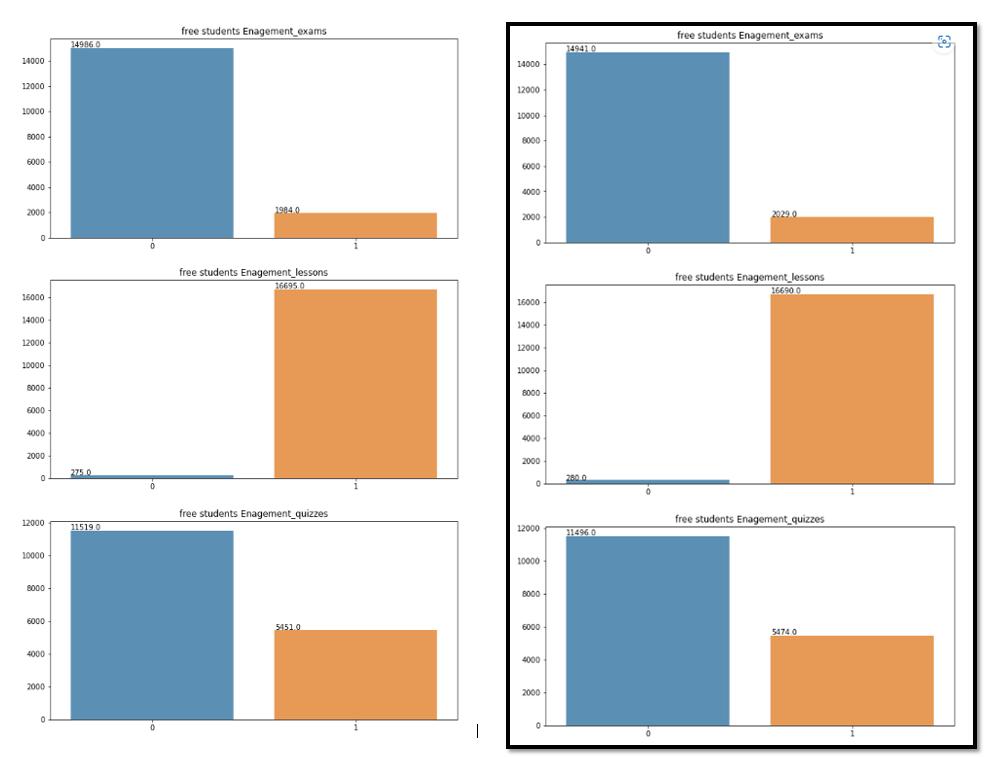

## 2.4. Preparing the final dataset

In [78]:
#concatening the before purchased paid student data and random free students data

In [79]:
df3 = pd.concat([before_purchased_date, not_purchased_random])
df3

,student_id,student_country,date_registered,purchase_type,date_purchased,purchased,course_id,minutes_watched,engagement_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged,difference
19,258822,IN,2022-01-01,2,2022-01-09 00:00:00,1,7,0.1,110952,1,1,1,2022-01-09 00:00:00,8 days
20,258822,IN,2022-01-01,2,2022-01-09 00:00:00,1,7,0.1,110953,1,1,1,2022-01-10 00:00:00,8 days
21,258822,IN,2022-01-01,2,2022-01-09 00:00:00,1,7,0.1,110954,1,0,1,2022-01-13 00:00:00,8 days
22,258822,IN,2022-01-01,2,2022-01-09 00:00:00,1,7,0.1,110955,1,0,1,2022-01-14 00:00:00,8 days
23,258822,IN,2022-01-01,2,2022-01-09 00:00:00,1,7,0.1,110956,1,0,1,2022-01-16 00:00:00,8 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,260247,MY,2022-01-13,0,0,0,104,31.0,380253,0,0,1,2022-02-09,NaT
38998,272173,PK,2022-04-27,0,0,0,197,466.2,608357,0,0,1,2022-06-12,NaT
40310,272782,US,2022-05-04,0,0,0,14,24.3,119721,1,0,1,2022-05-04,NaT
40999,273013,LT,2022-05-06,0,0,0,46,0.4,390845,0,0,1,2022-05-06,NaT


In [80]:
#shuffling the data
df3=df3.sample(frac=1).reset_index(drop=True)
df3

,student_id,student_country,date_registered,purchase_type,date_purchased,purchased,course_id,minutes_watched,engagement_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged,difference
0,261491,US,2022-01-24,2,2022-02-26 00:00:00,1,2027,8391.6,381790,0,0,1,2022-05-02 00:00:00,33 days
1,273862,CA,2022-05-13,2,2022-07-13 00:00:00,1,809,504.6,525265,0,0,1,2022-06-06 00:00:00,61 days
2,263913,US,2022-02-17,2,2022-06-17 00:00:00,1,4048,7289.5,115116,1,0,1,2022-03-03 00:00:00,120 days
3,266001,GB,2022-03-05,2,2022-06-06 00:00:00,1,10738,18840.3,386077,0,0,1,2022-05-09 00:00:00,93 days
4,280059,KE,2022-07-02,0,0,0,90,37.1,878601,0,0,1,2022-07-03,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75469,288426,IN,2022-08-28,0,0,0,252,324.0,1927193,0,0,1,2022-09-01,NaT
75470,264259,CA,2022-02-19,2,2022-04-20 00:00:00,1,985,1218.0,384782,0,0,1,2022-04-25 00:00:00,60 days
75471,259258,US,2022-01-04,2,2022-07-04 00:00:00,1,5949,10600.7,111247,1,0,1,2022-03-14 00:00:00,181 days
75472,264295,US,2022-02-20,3,2022-08-20 00:00:00,1,1130,4564.3,1101402,0,0,1,2022-07-20 00:00:00,181 days


In [81]:
#dropping the following data columns
df3=df3.drop(['student_id','engagement_id','date_registered','date_engaged',"date_purchased","difference","course_id","date_engaged"],axis=1)
df3

,student_country,purchase_type,purchased,minutes_watched,engagement_quizzes,engagement_exams,engagement_lessons
0,US,2,1,8391.6,0,0,1
1,CA,2,1,504.6,0,0,1
2,US,2,1,7289.5,1,0,1
3,GB,2,1,18840.3,0,0,1
4,KE,0,0,37.1,0,0,1
...,...,...,...,...,...,...,...
75469,IN,0,0,324.0,0,0,1
75470,CA,2,1,1218.0,0,0,1
75471,US,2,1,10600.7,1,0,1
75472,US,3,1,4564.3,0,0,1


In [82]:
#CREATING A UNIQUE NUMBER FOR COUNTRY CODE
country_code=pd.DataFrame()
country_code['country']=df3.student_country.unique()
country_code=country_code.reset_index()
country_code

,index,country
0,0,US
1,1,CA
2,2,GB
3,3,KE
4,4,ID
...,...,...
161,161,PG
162,162,KM
163,163,DM
164,164,IS


In [83]:
#replacing the student_country with numbers
for i in range(0,len(country_code)):
    df3=df3.replace(country_code['country'][i],country_code['index'][i])    

df3

,student_country,purchase_type,purchased,minutes_watched,engagement_quizzes,engagement_exams,engagement_lessons
0,104,2,1,8391.6,104,104,1
1,1,2,1,504.6,104,104,1
2,104,2,1,7289.5,1,104,1
3,2,2,1,18840.3,104,104,1
4,3,104,0,37.1,104,104,1
...,...,...,...,...,...,...,...
75469,9,104,0,324.0,104,104,1
75470,1,2,1,1218.0,104,104,1
75471,104,2,1,10600.7,1,104,1
75472,104,3,1,4564.3,104,104,1


In [84]:
#Converting the purchased column from string to int to understand the correlation of the targets with other data columns
df3['purchased']=df3['purchased'].astype(np.int64)

In [85]:
df3

,student_country,purchase_type,purchased,minutes_watched,engagement_quizzes,engagement_exams,engagement_lessons
0,104,2,1,8391.6,104,104,1
1,1,2,1,504.6,104,104,1
2,104,2,1,7289.5,1,104,1
3,2,2,1,18840.3,104,104,1
4,3,104,0,37.1,104,104,1
...,...,...,...,...,...,...,...
75469,9,104,0,324.0,104,104,1
75470,1,2,1,1218.0,104,104,1
75471,104,2,1,10600.7,1,104,1
75472,104,3,1,4564.3,104,104,1


In [86]:
#displaying the correlation of the data 
df3.corr()

,student_country,purchase_type,purchased,minutes_watched,engagement_quizzes,engagement_exams,engagement_lessons
student_country,1.000000,-0.193138,0.193623,0.061487,-0.032842,-0.039160,-0.002398
purchase_type,-0.193138,1.000000,-0.999976,-0.451524,0.042802,0.215289,-0.011452
purchased,0.193623,-0.999976,1.000000,0.454006,-0.042719,-0.215481,0.011531
minutes_watched,0.061487,-0.451524,0.454006,1.000000,0.015094,-0.141555,0.023958
engagement_quizzes,-0.032842,0.042802,-0.042719,0.015094,1.000000,0.126415,0.038387
engagement_exams,-0.039160,0.215289,-0.215481,-0.141555,0.126415,1.000000,-0.171711
engagement_lessons,-0.002398,-0.011452,0.011531,0.023958,0.038387,-0.171711,1.000000


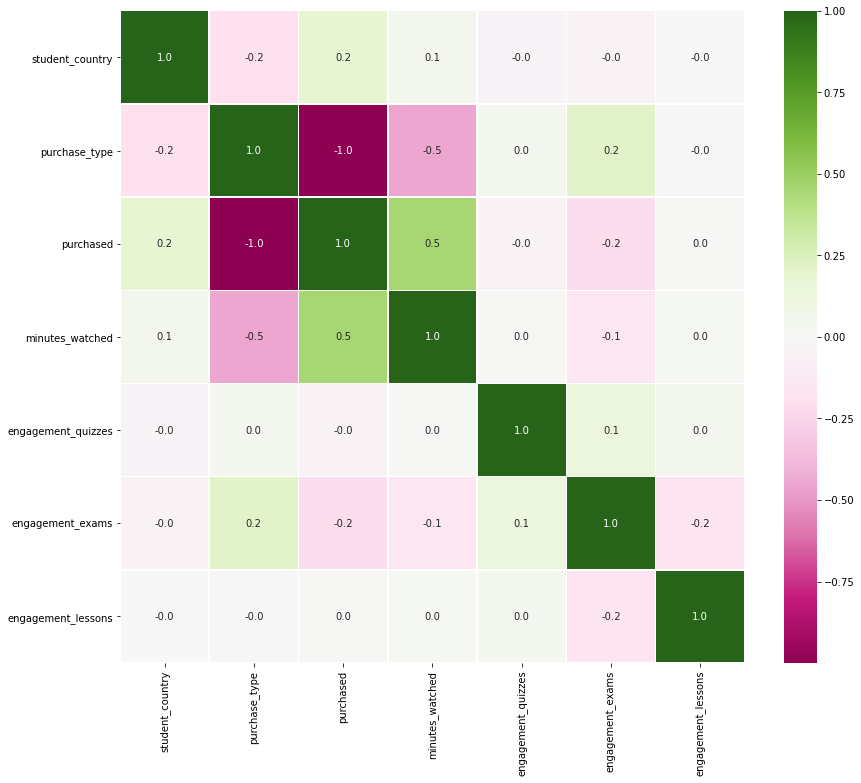

In [87]:
f,ax = plt.subplots(figsize=(14,12))
sns.heatmap(df3.corr(), cmap="PiYG", annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

We see that there is high negative correlation between purchase_type and the target. Thus, we are going to remove the purchase_type column to reduce overfitting

In [88]:
df4=df3.drop(['purchase_type'],axis=1)

In [89]:
df4.nunique()

student_country        165
purchased                2
minutes_watched       2521
engagement_quizzes       2
engagement_exams         2
engagement_lessons       2
dtype: int64

<AxesSubplot:>

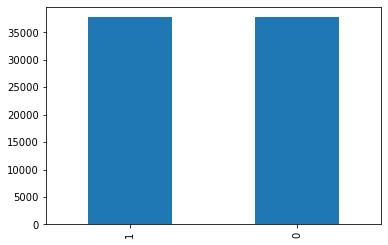

In [90]:
df4.purchased.value_counts()[:20].plot(kind='bar')

In [91]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75474 entries, 0 to 75473
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_country     75474 non-null  int64  
 1   purchased           75474 non-null  int64  
 2   minutes_watched     75474 non-null  float64
 3   engagement_quizzes  75474 non-null  int64  
 4   engagement_exams    75474 non-null  int64  
 5   engagement_lessons  75474 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.5 MB


In [92]:
df4

,student_country,purchased,minutes_watched,engagement_quizzes,engagement_exams,engagement_lessons
0,104,1,8391.6,104,104,1
1,1,1,504.6,104,104,1
2,104,1,7289.5,1,104,1
3,2,1,18840.3,104,104,1
4,3,0,37.1,104,104,1
...,...,...,...,...,...,...
75469,9,0,324.0,104,104,1
75470,1,1,1218.0,104,104,1
75471,104,1,10600.7,1,104,1
75472,104,1,4564.3,104,104,1


In [93]:
df4.describe()

,student_country,purchased,minutes_watched,engagement_quizzes,engagement_exams,engagement_lessons
count,75474.000000,75474.000000,75474.000000,75474.000000,75474.000000,75474.000000
mean,42.252325,0.500000,2177.209754,68.334711,83.360151,2.113602
std,39.854123,0.500003,4569.214636,49.005548,41.230130,10.651873
min,1.000000,0.000000,0.100000,1.000000,1.000000,1.000000
25%,9.000000,0.000000,12.700000,1.000000,104.000000,1.000000
50%,24.000000,0.500000,76.700000,104.000000,104.000000,1.000000
75%,80.750000,1.000000,1793.900000,104.000000,104.000000,1.000000
max,165.000000,1.000000,20785.300000,104.000000,104.000000,104.000000


# 3. Feature Scaling

In [94]:
X=df4.drop(['purchased'],axis=1)
y=df4['purchased']

In [95]:
scaler = StandardScaler()
X=scaler.fit_transform(X)


In [96]:
X.shape

(75474, 5)

# 4. Training the data 

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [98]:
#selecting validation data for further testing from train dataset
samples_count = X_train.shape[0]

train_samples_count = int(0.9*samples_count)
validation_samples_count = int(0.1*samples_count)

df3=df3.sample(frac=1).reset_index(drop=True)
df3

validation_inputs = X_train[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = y_train[train_samples_count:train_samples_count+validation_samples_count]

X_train = X_train[:train_samples_count]
y_train = y_train[:train_samples_count]


In [99]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test,y_test)  

0.9748261013580656

In [100]:
model = RandomForestClassifier()

model.fit(X_train,y_train)

model.score(X_test,y_test)

0.9697250745279894

In [101]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)                 
accuracy_score(y_test,pred)

0.8062934746604836

In [102]:
reg=LogisticRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.806160980457105

# 5. Model Evaluation

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


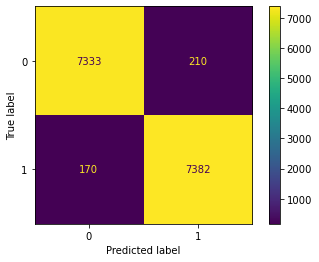

In [103]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree,X_test, y_test)  

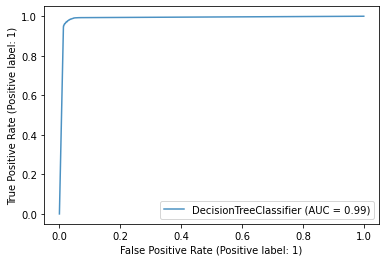

In [104]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=ax, alpha=0.8)

plt.show()

In [105]:
prediction_dt = tree.predict(X_test)
print(classification_report(y_test, prediction_dt))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7543
           1       0.97      0.98      0.97      7552

    accuracy                           0.97     15095
   macro avg       0.97      0.97      0.97     15095
weighted avg       0.97      0.97      0.97     15095



In [106]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, tree.predict(X_test))

0.9748245124843552

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(validation_targets, tree.predict(validation_inputs))

0.9726685439787974

In [108]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, tree.predict(X_test), squared=False)

0.1586628458144326

In [109]:
validation_targets

41269    1
58535    0
46562    1
66490    0
16535    1
        ..
44131    1
37194    0
6265     1
54886    1
860      0
Name: purchased, Length: 6037, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratified = []
for train_index, test_index in skf.split(X, y): 
    X_train_fold, X_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    model.fit(X_train_fold, y_train_fold) 
    
    lst_accu_stratified.append(tree.score(X_test_fold, y_test_fold))
print('Maximum Accuracy',max(lst_accu_stratified)) 
print('Minimum Accuracy:',min(lst_accu_stratified)) 
print('Overall Accuracy:',mean(lst_accu_stratified))

# To be Noted:
    

1. Due to high negative correlation of purchase_type and the target 'purchase' that column was removed from the above training . If not removed the final trained accuracy will be 100% 
2. This is a sign of overfitting and thus the changes were maid